<ipython-input-2-ce38b73caf9a>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prices[np.isnan(prices)] = np.median(prices[~np.isnan(prices)])


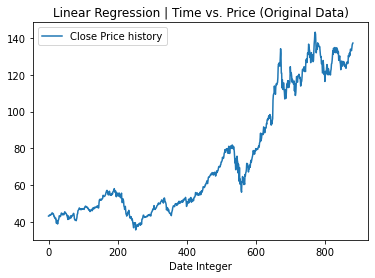

0.8113555263814287
0.8185779241087293
0.8255727039685014
0.8325055126187779
0.8417687088168712
0.8467226435827888
0.8525477052212942
Average Accuracy: 0.81581367863163


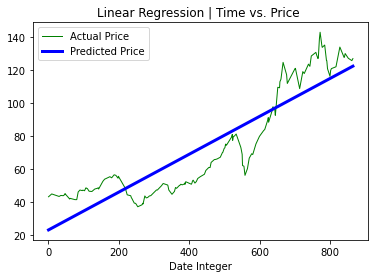

In [2]:
#reference link: https://github.com/LeeSinLiang/Predict-Stock-Price-With-Linear-Regression/blob/master/predict_stock_price.py
#refere ce link:https://github.com/samueljklee/stock-prediction-regression/blob/master/stock_prediction_regression.ipynb
#https://github.com/LeeSinLiang/Predict-Stock-Price-With-Linear-Regression

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
import os
from sklearn.metrics import mean_absolute_error as mae
from sklearn.linear_model import LassoLars
from sklearn.linear_model import BayesianRidge
from sklearn.linear_model import LinearRegression, Lasso, BayesianRidge, Ridge
from sklearn.preprocessing import PolynomialFeatures


df = pd.read_csv('APPL_2018_2021.csv')
dates = list(range(0,int(len(df))))
prices = df['Close']
#Impute missing values (NaN)
prices[np.isnan(prices)] = np.median(prices[~np.isnan(prices)])

#Plot Original Data
plt.plot(df['Close'], label='Close Price history')
plt.title('Linear Regression | Time vs. Price (Original Data)')
plt.legend()
plt.xlabel('Date Integer')
plt.show()

#Convert to numpy array and reshape them
dates = np.asanyarray(dates)
prices = np.asanyarray(prices)
dates = np.reshape(dates,(len(dates),1))
prices = np.reshape(prices, (len(prices), 1))

#calculate MAE #mean absolute error


#Load Pickle File to get the previous saved model accuracy
try:
  pickle_in = open("prediction.pickle", "rb")
  reg = pickle.load(pickle_in)
  xtrain, xtest, ytrain, ytest = train_test_split(dates, prices, test_size=0.2)
  best = reg.score(ytrain, ytest)
except:
  pass

#Get the highest accuracy model
best = 0
for _ in range(100):
    xtrain, xtest, ytrain, ytest = train_test_split(dates, prices, test_size=0.2)
    reg = LinearRegression().fit(xtrain, ytrain)
    acc = reg.score(xtest, ytest)
    if acc > best:
        best = acc
        #Save model to pickle format
        with open('prediction.pickle','wb') as f:
            pickle.dump(reg, f)
        print(acc)

#Load linear regression model
pickle_in = open("prediction.pickle", "rb")
reg = pickle.load(pickle_in)

#Get the average accuracy of the model
mean = 0
for i in range(10):
  #Random Split Data
  msk = np.random.rand(len(df)) < 0.8
  xtest = dates[~msk]
  ytest = prices[~msk]
  mean += reg.score(xtest,ytest)

print("Average Accuracy:", mean/10)

#Plot Predicted VS Actual Data
plt.plot(xtest, ytest, color='green',linewidth=1, label= 'Actual Price') #plotting the initial datapoints
plt.plot(xtest, reg.predict(xtest), color='blue', linewidth=3, label = 'Predicted Price') #plotting the line made by linear regression
plt.title('Linear Regression | Time vs. Price ')
plt.legend()
plt.xlabel('Date Integer')
plt.show()


In [3]:
from sklearn.metrics import mean_absolute_error as mae

#calculate MAE #mean absolute error

mae(xtest,ytest)

362.2778033063584

In [4]:
from sklearn.metrics import r2_score
r2_score(xtest, ytest)

-1.976578230112683

In [22]:
# lassolars_reg = LassoLars()
# lassolars_reg.fit(xtest, ytest)
# Y_pred = lassolars_reg.predict(xtest)

# Y_pred 

In [23]:
#Plot Predicted VS Actual Data
# plt.plot(xtest, xtest, color='green',linewidth=1, label= 'Actual Price') #plotting the initial datapoints
# plt.plot(xtest, Y_pred, color='blue', linewidth=3, label = 'Predicted Price') #plotting the line made by linear regression
# plt.title('Lasso Regression | Time vs. Price ')
# plt.legend()
# plt.xlabel('Date Integer')
# plt.show()

In [29]:
# import math
# from sklearn import preprocessing


# dfreg = df.loc[:,['Adj Close','Volume']]
# # Drop missing value
# dfreg.fillna(value=-99999, inplace=True)
# # We want to separate 1 percent of the data to forecast
# forecast_out = int(math.ceil(0.01 * len(dfreg)))
# # Separating the label here, we want to predict the AdjClose
# forecast_col = 'Adj Close'
# dfreg['label'] = dfreg[forecast_col].shift(-forecast_out)
# X = np.array(dfreg.drop(['label'], 1))
# # Scale the X so that everyone can have the same distribution for linear regression
# X = preprocessing.scale(X)
# # Finally We want to find Data Series of late X and early X (train) for model generation and evaluation
# X_lately = X[-forecast_out:]
# X = X[:-forecast_out]
# # Separate label and identify it as y
# y = np.array(dfreg['label'])
# y = y[:-forecast_out]
# y_lately = y[-forecast_out:]

NameError: name 'X' is not defined